In [1]:
"""Collate all stdstar files from blanc"""

'Collate all stdstar files from blanc'

In [39]:
import numpy as np
import pandas as pd
from astropy.io import fits
import fitsio
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")

from desitarget.sv1.sv1_targetmask import desi_mask, bgs_mask, mws_mask

In [7]:
flist = np.genfromtxt("../notes/stdstars-blanc_fits_list", dtype = 'str')

In [9]:
flist[0]

'/global/project/projectdirs/desi/spectro/redux/blanc/exposures/20201220/00069022/stdstars-0-00069022.fits'

Instructions for the fits are available at: https://desidatamodel.readthedocs.io/en/latest/DESI_SPECTRO_REDUX/SPECPROD/exposures/NIGHT/EXPID/stdstars-SPECTROGRAPH-EXPID.html

# Test a single file

In [10]:
hdu = fits.open(flist[0])

In [13]:
hdu.info()

Filename: /global/project/projectdirs/desi/spectro/redux/blanc/exposures/20201220/00069022/stdstars-0-00069022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  FLUX          1 PrimaryHDU      34   (118456, 22)   float32   
  1  WAVELENGTH    1 ImageHDU        10   (118456,)   float32   
  2  FIBERS        1 ImageHDU         9   (22,)   int32   
  3  METADATA      1 BinTableHDU     31   22R x 10C   [D, D, D, D, D, D, D, D, D, D]   
  4  COEFF         1 ImageHDU        10   (1491, 22)   float64   


In [16]:
flxs = hdu[0].data
wl = hdu[1].data
fibrs = hdu[2].data

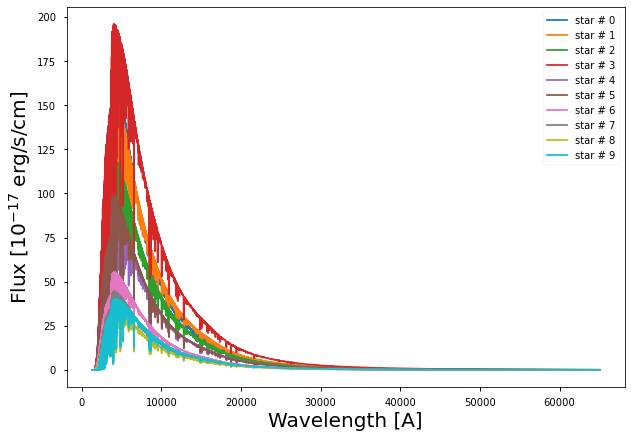

In [22]:
fs = 20 #fontsize 

plt.figure(figsize=(10, 7))
#plot first 10 std stars
for i in range(10):
    plt.plot(wl, flxs[i], label = f'star # {i}')
    
plt.xlabel("Wavelength [A]", fontsize = fs)
plt.ylabel(r"Flux [$10^{-17}$ erg/s/cm]", fontsize = fs)
plt.legend(loc = 'best')

In [23]:
wl

array([ 1300.0392,  1300.0822,  1300.125 , ..., 64995.54  , 64997.688 ,
       64999.832 ], dtype=float32)

In [24]:
wl.shape

(118456,)

These files are stellar *models*, not actual data. 

# Look at actual zcatalog file in blanc for std stars 

In [37]:
specprod = 'blanc'
specprod_dir = f'/global/cfs/cdirs/desi/spectro/redux/{specprod}'
sv1all = fitsio.read(specprod_dir + '/zcatalog-blanc-sv1all.fits')

In [57]:
targetids, ii = np.unique(sv1all['TARGETID'], return_index=True)
if len(targetids) < len(sv1all):
    sv1all = sv1all[ii]
    
targetcol = 'SV1_DESI_TARGET'
stdFaintMask = desi_mask.mask('STD_FAINT')

DELTACHI2_threshold = 25

desi_target = sv1all[targetcol]
isStar = (sv1all['SPECTYPE'] == 'STAR')

isfaintStar = ((desi_target & stdFaintMask) != 0) & isStar 

In [58]:
np.sum(isfaintStar)

1863

In [64]:
len(np.unique(sv1all[isfaintStar]['TILEID']))

16

In [42]:
flist[0]

'/global/project/projectdirs/desi/spectro/redux/blanc/exposures/20201220/00069022/stdstars-0-00069022.fits'

In [51]:
hdutmp = fits.open('/global/project/projectdirs/desi/spectro/redux/blanc/tiles/63075/20200220/cframe-r0-00051126.fits')

In [52]:
hdutmp.info()

Filename: /global/project/projectdirs/desi/spectro/redux/blanc/tiles/63075/20200220/cframe-r0-00051126.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  FLUX          1 PrimaryHDU     441   (2326, 500)   float32   
  1  IVAR          1 ImageHDU        10   (2326, 500)   float32   
  2  MASK          1 ImageHDU        12   (2326, 500)   int32 (rescales to uint32)   
  3  WAVELENGTH    1 ImageHDU        10   (2326,)   float64   
  4  RESOLUTION    1 ImageHDU        11   (2326, 11, 500)   float32   
  5  FIBERMAP      1 BinTableHDU    683   500R x 131C   [K, I, J, K, J, J, D, D, E, E, E, E, E, E, K, B, 3A, E, E, I, J, D, J, J, I, J, 8A, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, B, B, I, K, 2A, E, E, E, E, E, E, E, E, L, E, L, E, E, 1A, K, K, K, K, E, E, E, E, K, K, K, K, D, D, D, D, D, D]   
  6  CHI2PIX      

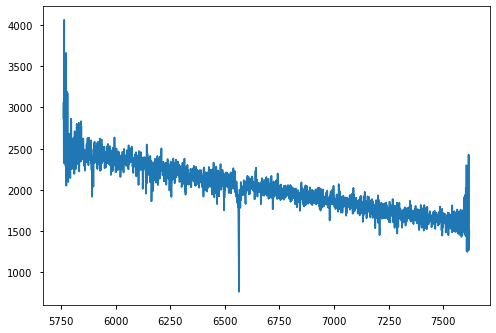

In [53]:
plt.plot(hdutmp[3].data, hdutmp[0].data[0])
#plt.plot(hdutmp[7].data, hdutmp[8].data[0])
#plt.plot(hdutmp[12].data, hdutmp[13].data[0])

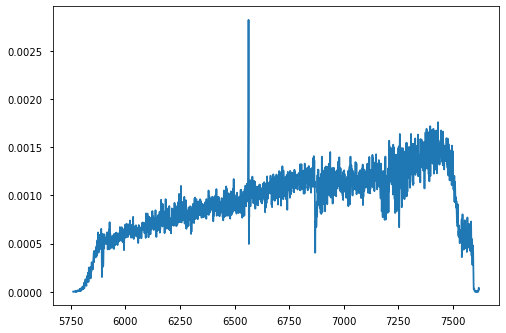

In [54]:
plt.plot(hdutmp[3].data, hdutmp[1].data[0])
#plt.plot(hdutmp[7].data, hdutmp[9].data[0])
#plt.plot(hdutmp[12].data, hdutmp[14].data[0])

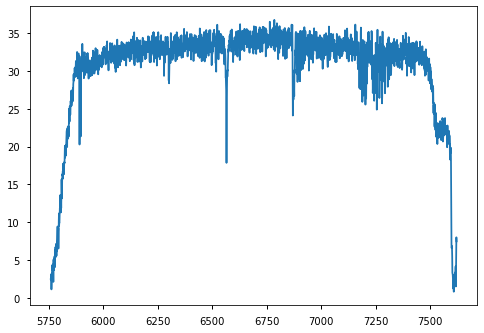

In [56]:
plt.plot(hdutmp[3].data, hdutmp[0].data[5] * np.sqrt(hdutmp[1].data[5]))

# Instructions from https://github.com/desihub/tutorials/blob/master/Intro_to_DESI_SV_spectra.ipynb